# tf.data

In [2]:
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/batang.ttc'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

C:\Users\Ssoony\AppData\Local\Temp\ipykernel_22156\3250618501.py:10: MatplotlibDeprecationWarning: The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()
Matplotlib needs fontconfig>=2.7 to query system fonts.


In [3]:
path='C:/Users/Ssoony/Documents/ds_study/data/DL_data/data/'
dataset = {'where':[], 'img_path' :[], 'status':[], 'ID':[]}

In [4]:
for where in os.listdir(path):
    for id in os.listdir(path + where + '/img_data_control'):
        for img in glob(path + where + '/img_data_control/' + id + '/*.jpg'):
            dataset['where'].append(where)
            dataset['img_path'].append(img)
            dataset['status'].append(img.split('_')[-4])
            dataset['ID'].append(id)
                

In [5]:
data_last = pd.DataFrame(dataset)
data_last.head()

,where,img_path,status,ID
0,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,정상주시,001_G1
1,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,정상주시,001_G1
2,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,졸음재현,001_G1
3,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,졸음재현,001_G1
4,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,하품재현,001_G1


In [6]:
len(data_last)

112866

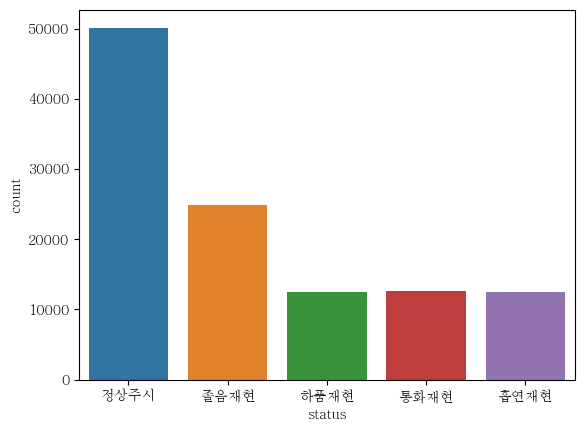

In [7]:
sns.countplot(x='status', data = data_last)
plt.show()

In [8]:
import cv2

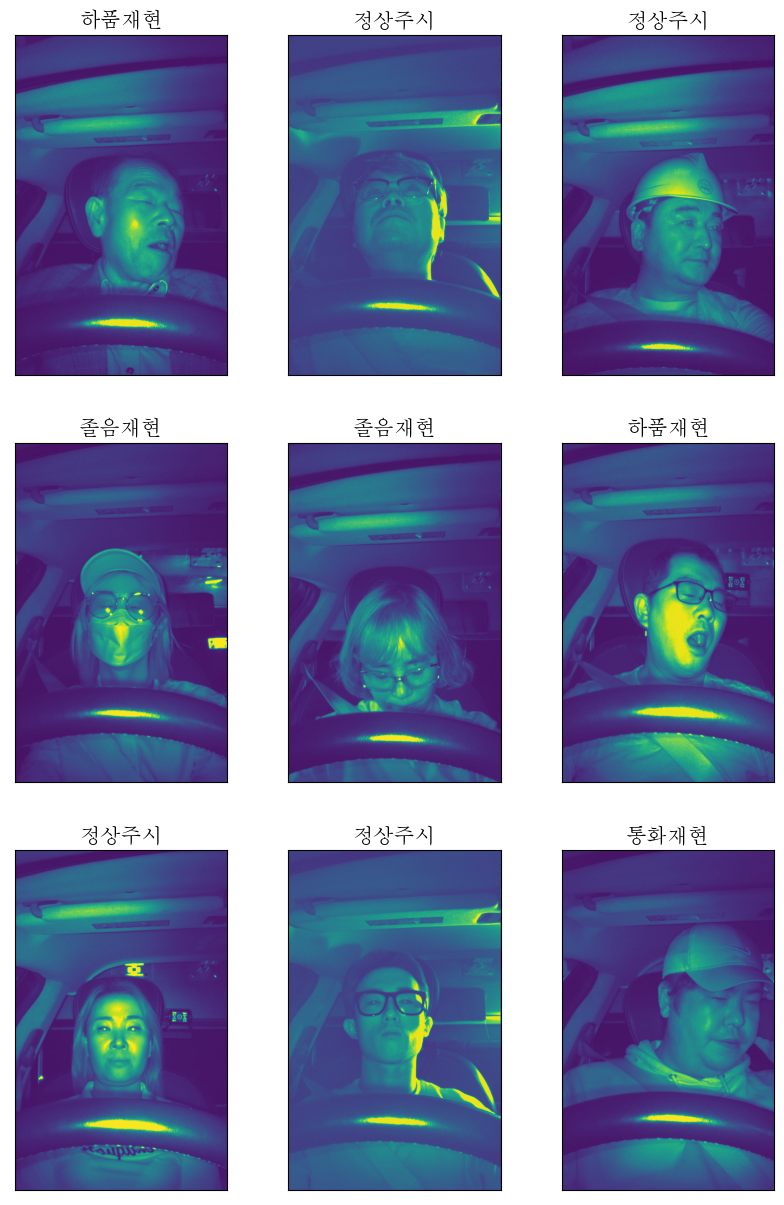

In [9]:
plt.figure(figsize=(10,15))
for i in range(9):
    random = np.random.randint(1,len(data_last))
    plt.subplot(3,3,i+1)
    plt.imshow(cv2.imdecode(np.fromfile(data_last.loc[random, 'img_path'], dtype=np.uint8), cv2.IMREAD_GRAYSCALE))
    plt.title(data_last.loc[random,'status'], size=15)
    plt.xticks([])
    plt.yticks([])
plt.show() 

# 데이터 전처리

## - 데이터 불러오기

In [86]:
x_train_path_list=list(data_last[data_last['where']=='Training']['img_path'])
x_test_path_list=list(data_last[data_last['where']=='Validation']['img_path'])

In [87]:
label_names=list(data_last['status'].unique())

## - resize 하기

In [144]:
width=50
aspect_ratio = float(width) / img.shape[1]
dsize = [int(img.shape[0] * aspect_ratio),width]

In [145]:
dsize

[80, 50]

In [90]:
def get_label(path):
    lbl_name = tf.strings.split(path, '_')[-4]
    onehot = tf.cast(lbl_name == label_names, tf.float32)
    return onehot

In [146]:
def load_img_label(path):
    gfile = tf.io.read_file(path)
    img = tf.io.decode_image(gfile, expand_animations=False)
    img = tf.image.resize(img, [80, 50])
    img = tf.cast(img, tf.uint8)
    label = get_label(path)
    return img, label

## - dataset 만들기

In [168]:
train_dataset = tf.data.Dataset.from_tensor_slices(x_train_path_list)
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.map(load_img_label, num_parallel_calls=AUTOTUNE)
train_dataset = train_dataset.batch(32)
train_dataset = train_dataset.prefetch(AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size=1)
train_dataset = train_dataset.repeat()

In [169]:
test_dataset = tf.data.Dataset.from_tensor_slices(x_test_path_list)
AUTOTUNE = tf.data.experimental.AUTOTUNE
test_dataset = test_dataset.map(load_img_label, num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.batch(32)
test_dataset = test_dataset.prefetch(AUTOTUNE)
test_dataset = test_dataset.shuffle(buffer_size=1)
test_dataset = test_dataset.repeat()

## - ImageDataGenerator

In [153]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [164]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    horizontal_flip=True
)

In [172]:
data_last

,where,img_path,status,ID
0,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,정상주시,001_G1
1,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,정상주시,001_G1
2,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,졸음재현,001_G1
3,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,졸음재현,001_G1
4,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,하품재현,001_G1
...,...,...,...,...
112861,Validation,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,졸음재현,267_G1
112862,Validation,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,정상주시,267_G1
112863,Validation,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,정상주시,267_G1
112864,Validation,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,졸음재현,267_G1


In [208]:
data_last[data_last['where']=='Training']

,where,img_path,status,ID
0,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,정상주시,001_G1
1,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,정상주시,001_G1
2,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,졸음재현,001_G1
3,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,졸음재현,001_G1
4,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,하품재현,001_G1
...,...,...,...,...
100298,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,졸음재현,266_G4
100299,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,정상주시,266_G4
100300,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,정상주시,266_G4
100301,Training,C:/Users/Ssoony/Documents/ds_study/data/DL_dat...,졸음재현,266_G4


In [210]:
train_x_gen = datagen.flow_from_dataframe(
    data_last[data_last['where']=='Training'],
    x_col='img_path',
    y_col='status',
    target_size=(80,50),
    class_model = 'categorical',
    color_mode='grayscale',
    batch_size=32
)

Found 100303 validated image filenames belonging to 5 classes.


In [211]:
test_x_gen = datagen.flow_from_dataframe(
    data_last[data_last['where']=='Validation'],
    x_col='img_path',
    y_col='status',
    target_size=(80,50),
    class_model = 'categorical',
    color_mode='grayscale',
    batch_size=32
)

Found 12563 validated image filenames belonging to 5 classes.


In [202]:
x,y = next(iter(test_x_gen))

In [203]:
x.shape

(32, 80, 50, 1)

# ResNET

In [133]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Add

In [187]:
def build_resnet(input_shape):
    inputs = Input(input_shape)

    net = Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu')(inputs)
    net = MaxPool2D()(net)

    net1 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net)
    net2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(net1)
    net3 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net2)

    net_1_1 = Conv2D(64, kernel_size=1, padding='same')(net)
    net = Add()([net_1_1, net3])

    net1 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net)
    net2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(net1)
    net3 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net2)

    net = Add()([net, net3])

    net = MaxPool2D()(net)

    net = Flatten()(net)
    net = Dense(5, activation='softmax')(net)

    model = tf.keras.Model(inputs = inputs, outputs = net, name = 'resnet')

    return model

In [188]:
model1 = build_resnet((80, 50, 1))
model1.summary()

Model: "resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 80, 50, 1)]  0           []                               
                                                                                                  
 conv2d_48 (Conv2D)             (None, 40, 25, 32)   320         ['input_7[0][0]']                
                                                                                                  
 max_pooling2d_12 (MaxPooling2D  (None, 20, 12, 32)  0           ['conv2d_48[0][0]']              
 )                                                                                                
                                                                                                  
 conv2d_49 (Conv2D)             (None, 20, 12, 64)   2112        ['max_pooling2d_12[0][0]']  

In [309]:
learning_rate = 0.05
opt = tf.keras.optimizers.Adam(learning_rate)
loss = tf.keras.losses.categorical_crossentropy

In [310]:
model1.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [311]:
hist1 = model1.fit(train_dataset, epochs=5, steps_per_epoch=len(x_train_path_list)//32, validation_data=test_dataset, validation_steps=len(x_test_path_list)//32)

Epoch 1/5
 250/3134 [=>............................] - ETA: 4:07 - loss: 283.9777 - accuracy: 0.2984

KeyboardInterrupt: 

# ImageGenerator 데이터

In [204]:
model2 = build_resnet((80, 50, 1))
model2.summary()

Model: "resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 80, 50, 1)]  0           []                               
                                                                                                  
 conv2d_64 (Conv2D)             (None, 40, 25, 32)   320         ['input_9[0][0]']                
                                                                                                  
 max_pooling2d_16 (MaxPooling2D  (None, 20, 12, 32)  0           ['conv2d_64[0][0]']              
 )                                                                                                
                                                                                                  
 conv2d_65 (Conv2D)             (None, 20, 12, 64)   2112        ['max_pooling2d_16[0][0]']  

In [212]:
model2.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [213]:
hist2 = model2.fit(train_x_gen, epochs=5, validation_data=test_x_gen)

Epoch 1/5
3135/3135 [==============================] - 718s 229ms/step - loss: 25.1312 - accuracy: 0.2809 - val_loss: 32.0761 - val_accuracy: 0.4403
Epoch 2/5
3135/3135 [==============================] - 709s 226ms/step - loss: 43.2359 - accuracy: 0.2854 - val_loss: 46.6493 - val_accuracy: 0.2298
Epoch 3/5
3135/3135 [==============================] - 751s 239ms/step - loss: 45.3638 - accuracy: 0.2831 - val_loss: 30.6197 - val_accuracy: 0.1150
Epoch 4/5
3135/3135 [==============================] - 726s 232ms/step - loss: 31.7110 - accuracy: 0.2860 - val_loss: 19.0336 - val_accuracy: 0.1150
Epoch 5/5
3135/3135 [==============================] - 716s 229ms/step - loss: 16.8926 - accuracy: 0.2865 - val_loss: 6.1339 - val_accuracy: 0.1150


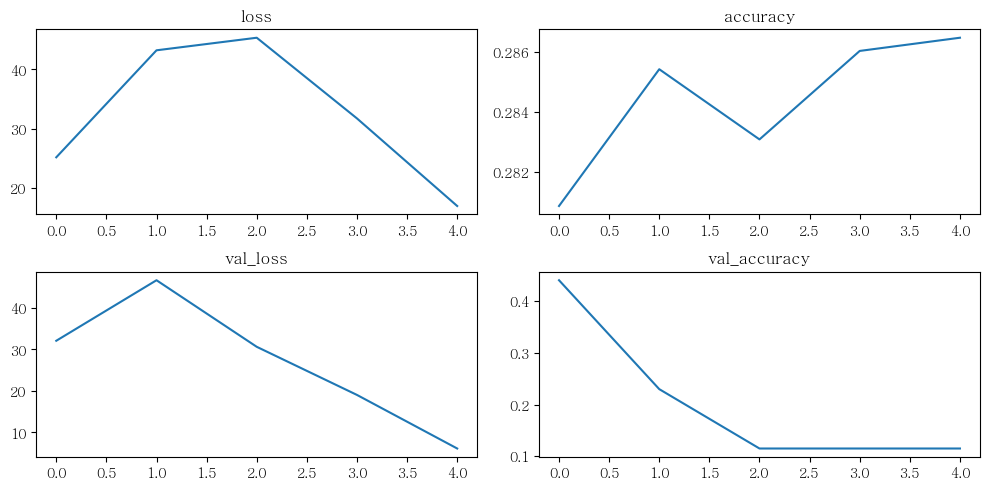

In [214]:
plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(hist2.history['loss'])
plt.title('loss')
plt.subplot(222)
plt.plot(hist2.history['accuracy'])
plt.title('accuracy')
plt.subplot(223)
plt.plot(hist2.history['val_loss'])
plt.title('val_loss')
plt.subplot(224)
plt.plot(hist2.history['val_accuracy'])
plt.title('val_accuracy')

plt.tight_layout()
plt.show()

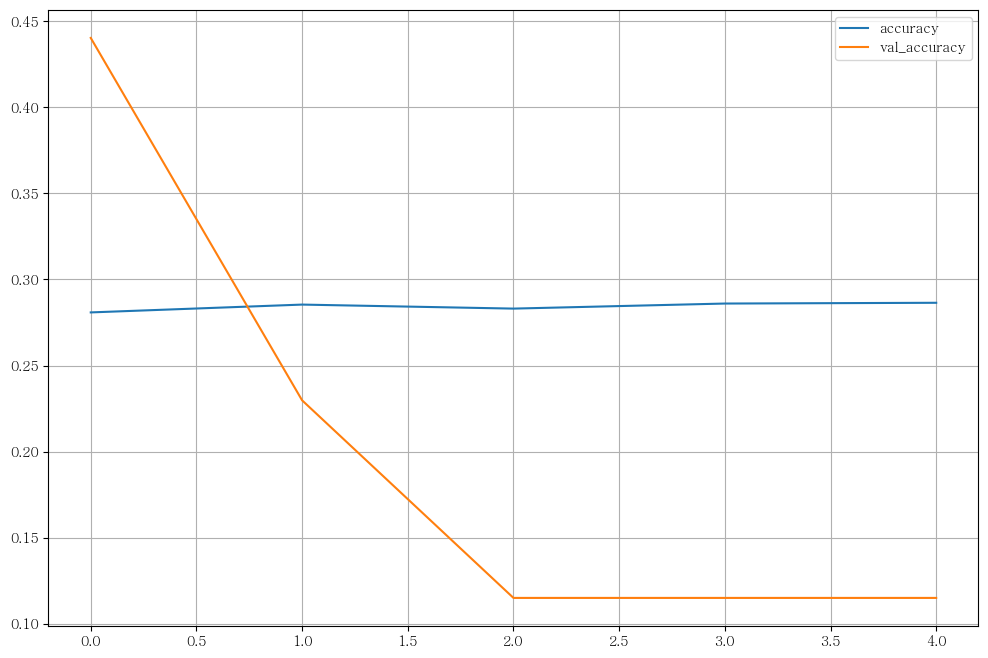

In [216]:
plot_target = ['accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist2.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [259]:
from numpy import argmax

In [244]:
yhat = model2.predict(test_x_gen)

In [270]:
len(yhat)

12563

In [246]:
x,y =test_x_gen[0]

In [261]:
label_names[argmax(y[0])]

'통화재현'

In [264]:
def get_label_name(onehot):
    return label_names[argmax(onehot)]

In [275]:
actually_class=[]
predicted_class=[]


In [279]:
x,y = test_x_gen[0]

In [294]:
get_label_name(y[5])

'하품재현'